![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Importación librerías
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [29]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data = pd.DataFrame(data, columns=data.columns)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


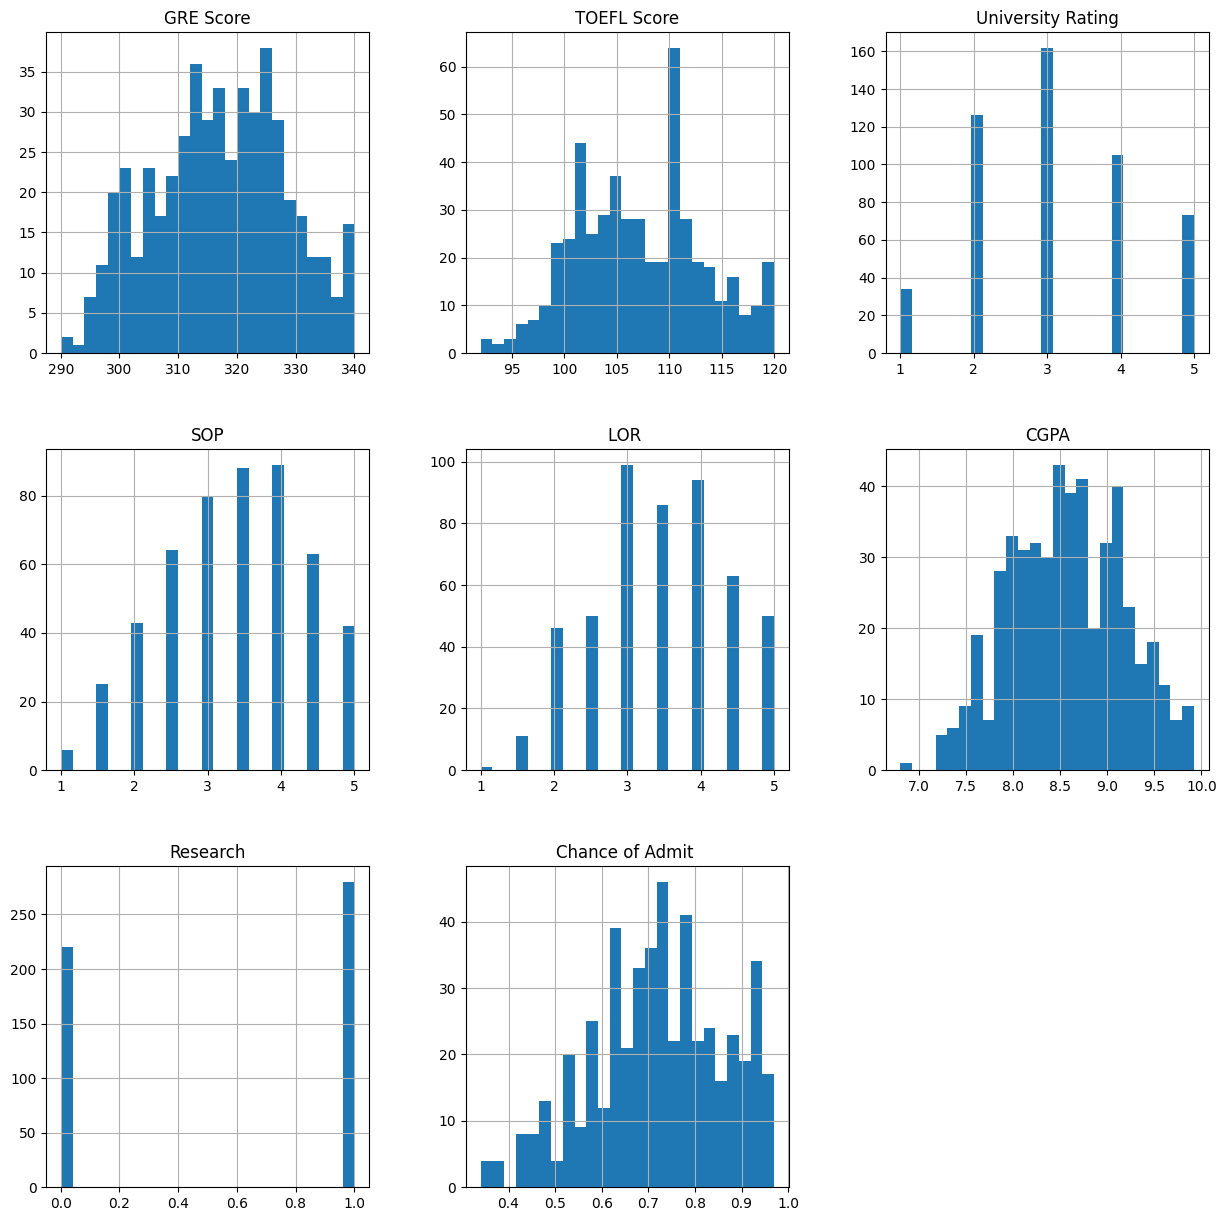

In [30]:
# Histogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [31]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = data[data.columns[-1]]

In [35]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)

## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

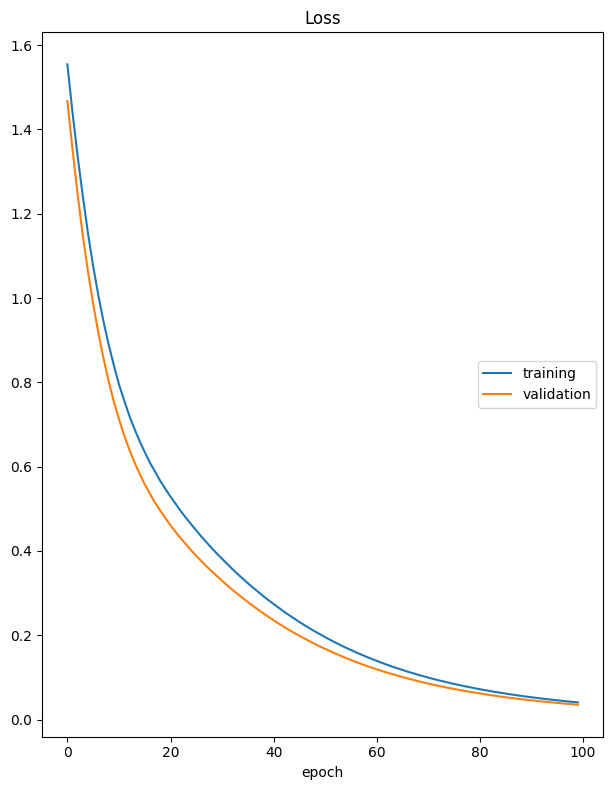

Loss
	training         	 (min:    0.041, max:    1.554, cur:    0.041)
	validation       	 (min:    0.035, max:    1.468, cur:    0.035)
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0415 - val_loss: 0.0354
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Error absoluto medio (MAE): 0.14510488751729325
Error cuadrático medio (MSE): 0.035364783832116664


In [51]:
# Celda 1
# Normalización de variables predictoras (X) con la función StandardScaler
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Activation
from livelossplot import PlotLossesKeras
from keras import backend as K
import keras.optimizers as opts

# Definición de la función StandardScaler
scaler = StandardScaler()

# Transformación de los set de entrenamiento y test
xTrain = scaler.fit_transform(xTrain)
xTest = scaler.transform(xTest)

# # Definición de dimensiones de salida
output_var = yTrain.shape[0]
print(output_var, ' output variables')

# # Definición de dimensiones de entrada
dims = xTrain.shape[1]
print(dims, 'input variables')

# #Red neuronal
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()
# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(1, input_shape=(dims,)))

#Impresión de la arquitectura de la red neuronal
print(model.summary())

#Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenamiento de la red neuronal con 50 épocas
model.fit(xTrain, yTrain, 
          verbose=1, 
          epochs=100, 
          validation_data=(xTest,yTest),
          callbacks=[PlotLossesKeras()])

#Evaluando el desempeño de la red_neuronal con ADAM
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Predecir las probabilidades de admisión en el conjunto de prueba
yPred = model.predict(xTest)
# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(yTest, yPred)
print("Error absoluto medio (MAE):", mae)
# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(yTest, yPred)
print("Error cuadrático medio (MSE):", mse)

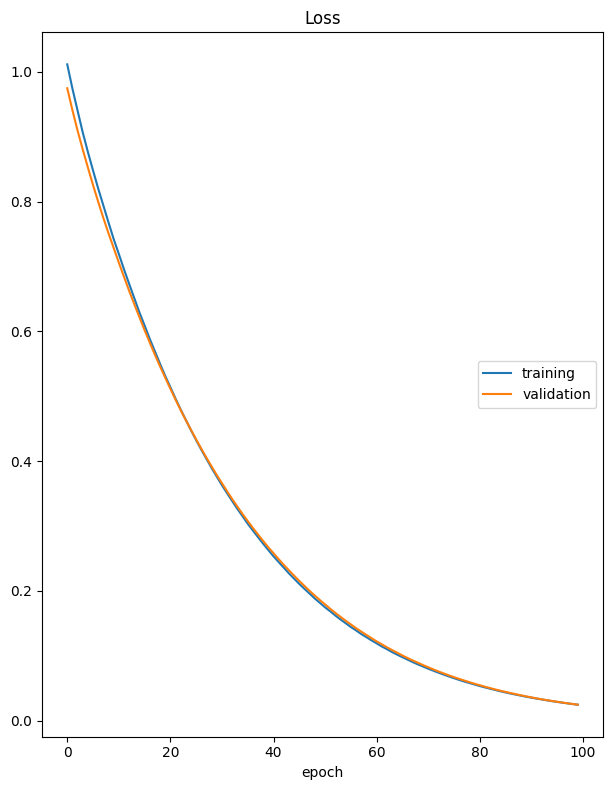

Loss
	training         	 (min:    0.025, max:    1.011, cur:    0.025)
	validation       	 (min:    0.025, max:    0.975, cur:    0.025)
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0253 - val_loss: 0.0247
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/stepWARNING:tensorflow:5 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000002C77ABA9F80> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
5/5 ━━━━━━━━━━━━━━━━━━━━ 

In [52]:
#Realizando el mismo ejercicio pero seleccionando como optimizador a RMStrop
model = Sequential()
model.add(Dense(1, input_shape=(dims,)))
#Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='adam', loss='mean_squared_error')
# Entrenamiento de la red neuronal con 50 épocas
model.fit(xTrain, yTrain, 
          verbose=1, 
          epochs=100, 
          validation_data=(xTest,yTest),
          callbacks=[PlotLossesKeras()])

#Evaluando el desempeño de la red_neuronal con RMStrop
yPred = model.predict(xTest)
mae = mean_absolute_error(yTest, yPred)
print("Error absoluto medio (MAE) usando RMStrop:", mae)
mse = mean_squared_error(yTest, yPred)
print("Error cuadrático medio (MSE) usando RMStrop:", mse)

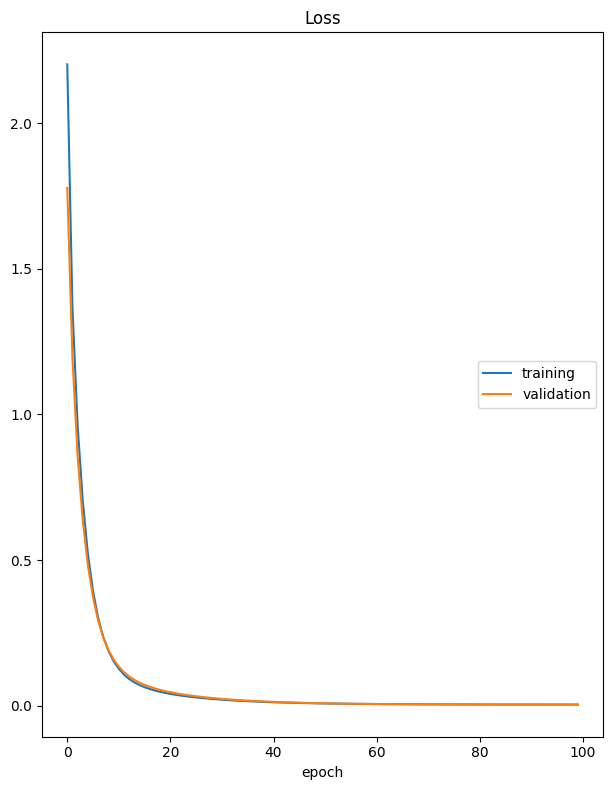

Loss
	training         	 (min:    0.004, max:    2.202, cur:    0.004)
	validation       	 (min:    0.003, max:    1.777, cur:    0.003)
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0040 - val_loss: 0.0034
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Error absoluto medio (MAE) usando sgd: 0.04314802696704864
Error cuadrático medio (MSE) usando sgd: 0.0034080419856307533


In [53]:
#Realizando el mismo ejercicio pero seleccionando como optimizador a sgd
model = Sequential()
model.add(Dense(1, input_shape=(dims,)))
#Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='sgd', loss='mean_squared_error')
# Entrenamiento de la red neuronal con 50 épocas
model.fit(xTrain, yTrain, 
          verbose=1, 
          epochs=100, 
          validation_data=(xTest,yTest),
          callbacks=[PlotLossesKeras()])

#Evaluando el desempeño de la red_neuronal con RMStrop
yPred = model.predict(xTest)
mae = mean_absolute_error(yTest, yPred)
print("Error absoluto medio (MAE) usando sgd:", mae)
mse = mean_squared_error(yTest, yPred)
print("Error cuadrático medio (MSE) usando sgd:", mse)

### JUSTIFICACION DE PUNTO1
* *SELECCION DE PARAMETROS PARA LA FUNCION DE PERDIDA:* Teniendo presente que el problema que se va resolver en la red neuronal es la predeccion de un valor numerico continuo( la probabilidad de admision), se considera un problema de regresion. la funcion de perdida que se opta por usar es el error absoluto medio (MAE), teniendo presente que dentro de la distribuccion de mi variable objetivo se observaron valores atipicos y se desea que el modelo sea mas robusto a ellos.
Ahora para seleccionar el mejor optmizador segun el tipo de problema, se toma la decision de usar en una primera instancia el optimizador mas popular Y mas rapido en su convergencia (ADAM),Luego se hara la prueba con RMStrop que es el segundo mas rapido en su convergencia y por ultimo el sgd.Observando los resultados obtenidos, se concluye que el sgd es el mejor metodo a usar en este caso, ya que es el que tiene el menor MAE y MSE entre los tres metodos evaluados, es decir, el metodo sgd produce resultados mas precisos y tiene errores de prediccion mas bajos. 
Por otro lado si observamos el grafico del sgd podemos concluir que el modelo se establizo desde la epoca 40. este podria ser un util para emplear con el metodo early stopping.

## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [ ]:
# Celda 2
#PDT de ana :seleccionar optimizador sgd y usar early stopping y parar en la epoca 40 segun lo que observa en el punto1

## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [ ]:
# Celda 3


## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

In [ ]:
# Celda 4
